# **DIP assignment 3**
- - - - 


In [1]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import math
from math import exp,sqrt
import time
import random
import resource, sys
resource.setrlimit(resource.RLIMIT_STACK, (2**29,-1))
sys.setrecursionlimit(10**6)

In [2]:
y_cord = np.zeros(15)
y_cord[0] = 800
y_cord[1] = 842
y_cord[2] = 884
y_cord[3] = 926
y_cord[4] = 968
y_cord[5] = 1010
y_cord[6] = 1054
y_cord[7] = 1096
y_cord[8] = 1138
y_cord[9] = 1180
y_cord[10] = 1222
y_cord[11] = 1264
y_cord[12] = 1308
y_cord[13] = 1350
y_cord[14] = 1393
y_cord = y_cord.astype('int')

print(y_cord)

x_cord = np.zeros(12)
x_cord[0] = 222
x_cord[1] = 262
x_cord[2] = 307
x_cord[3] =  349
x_cord[4] = 560
x_cord[5] = 602
x_cord[6] = 645
x_cord[7] = 686
x_cord[8] = 896
x_cord[9] = 937
x_cord[10] = 980
x_cord[11] = 1022
x_cord = x_cord.astype('int')

[ 800  842  884  926  968 1010 1054 1096 1138 1180 1222 1264 1308 1350
 1393]


In [3]:
def adaptive_mean_thresholding(grayscale_image, radius):
    bw_image = np.zeros_like(grayscale_image)
    max_row, max_col = grayscale_image.shape
    for i, row in enumerate((grayscale_image)):
       
        for j, elem in enumerate(row):
            
            if (grayscale_image[i, j] <= radius):
                bw_image[i, j] = 0
            else :
                 bw_image[i, j] = 255
    return bw_image

In [4]:
default_structure = np.ones((3, 3))
def idx_check(index):
    if index < 0:
        return 0
    else:
        return index

def dilation(binary_img_matrix = None, structuring_element = default_structure):
    binary_img_matrix = np.asarray(binary_img_matrix)
    structuring_element = np.asarray(structuring_element)
    ste_shp = structuring_element.shape
    dilated_img = np.zeros((binary_img_matrix.shape[0], binary_img_matrix.shape[1]))
    ste_origin = (int(np.ceil((structuring_element.shape[0]-1)/2.0)), int(np.ceil((structuring_element.shape[1]-1)/2)))
    for i in range(len(binary_img_matrix)):
        for j in range(len(binary_img_matrix[0])):
            overlap = binary_img_matrix[idx_check(i - ste_origin[0]):i + (ste_shp[0] - ste_origin[0]), idx_check(j - ste_origin[1]):j + (ste_shp[1] - ste_origin[1])]
            shp = overlap.shape

            ste_first_row_idx = int(np.fabs(i - ste_origin[0])) if i - ste_origin[0] < 0 else 0
            ste_first_col_idx = int(np.fabs(j - ste_origin[1])) if j - ste_origin[1] < 0 else 0

            ste_last_row_idx = ste_shp[0] - 1 - (i + (ste_shp[0] - ste_origin[0]) - binary_img_matrix.shape[0]) if i + (ste_shp[0] - ste_origin[0]) > binary_img_matrix.shape[0] else ste_shp[0]-1
            ste_last_col_idx = ste_shp[1] - 1 - (j + (ste_shp[1] - ste_origin[1]) - binary_img_matrix.shape[1]) if j + (ste_shp[1] - ste_origin[1]) > binary_img_matrix.shape[1] else ste_shp[1]-1

            if shp[0] != 0 and shp[1] != 0 and np.logical_and(structuring_element[ste_first_row_idx:ste_last_row_idx+1, ste_first_col_idx:ste_last_col_idx+1], overlap).any():
                dilated_img[i, j] = 1
    return dilated_img

def erosion(binary_img_matrix = None, structuring_element = default_structure):
    binary_img_matrix = np.asarray(binary_img_matrix)
    structuring_element = np.asarray(structuring_element)
    ste_shp = structuring_element.shape
    eroded_img = np.zeros((binary_img_matrix.shape[0], binary_img_matrix.shape[1]))
    ste_origin = (int(np.ceil((structuring_element.shape[0] - 1) / 2.0)), int(np.ceil((structuring_element.shape[1] - 1) / 2.0)))
    for i in range(len(binary_img_matrix)):
        for j in range(len(binary_img_matrix[0])):
            overlap = binary_img_matrix[idx_check(i - ste_origin[0]):i + (ste_shp[0] - ste_origin[0]),
                      idx_check(j - ste_origin[1]):j + (ste_shp[1] - ste_origin[1])]
            shp = overlap.shape
            ste_first_row_idx = int(np.fabs(i - ste_origin[0])) if i - ste_origin[0] < 0 else 0
            ste_first_col_idx = int(np.fabs(j - ste_origin[1])) if j - ste_origin[1] < 0 else 0

            ste_last_row_idx = ste_shp[0] - 1 - (i + (ste_shp[0] - ste_origin[0]) - binary_img_matrix.shape[0]) if i + (ste_shp[0] - ste_origin[0]) > binary_img_matrix.shape[0] else ste_shp[0]-1
            ste_last_col_idx = ste_shp[1] - 1 - (j + (ste_shp[1] - ste_origin[1]) - binary_img_matrix.shape[1]) if j + (ste_shp[1] - ste_origin[1]) > binary_img_matrix.shape[1] else ste_shp[1]-1

            if shp[0] != 0 and shp[1] != 0 and np.array_equal(np.logical_and(overlap, structuring_element[ste_first_row_idx:ste_last_row_idx+1,
                                                                       ste_first_col_idx:ste_last_col_idx+1]),structuring_element[ste_first_row_idx:ste_last_row_idx+1,
                                                                       ste_first_col_idx:ste_last_col_idx+1]):
                eroded_img[i, j] = 1
    return eroded_img




In [5]:
from matplotlib.pyplot import figure


im = cv2.imread("../imgs/answerKey.jpg",0)
im = adaptive_mean_thresholding(im, 100)
im= 255-im

kernel = np.ones((5,5), np.uint8)
output_im = erosion(im, kernel)

output_im = dilation(output_im, kernel)
#plt.imshow(output_im,cmap='gray')
a = []
b= []
c= []
ans = -1


for i in range(15) :
    for j in range(12) :
        
        temp = im[y_cord[i]:y_cord[i]+30,x_cord[j]:x_cord[j]+30] 
        ans=-1
        print(np.sum(temp)*100/(255*30*30))
        if(np.sum(temp)*100/(255*30*30) >0.1) :
            if(j%4==0) :
               ans = 'A'
            elif(j%4==1) :
               ans ='B'
            elif(j%4==2) :
               ans ='C'
            elif(j%4==3) :
               ans='D'
            
        if(ans != -1)  :
           print(ans) 
           
        temp =[ans]
        if(int(j/4)==0 and ans != -1) :
             a = a+temp
        elif(int(j/4)==1 and ans != -1) :
            b = b+temp
        elif(int(j/4)==2 and ans !=-1) :
            c=c+temp

         
result = a+b+c
print(result)


KeyboardInterrupt: 

## *Question 2*

(388, 254)


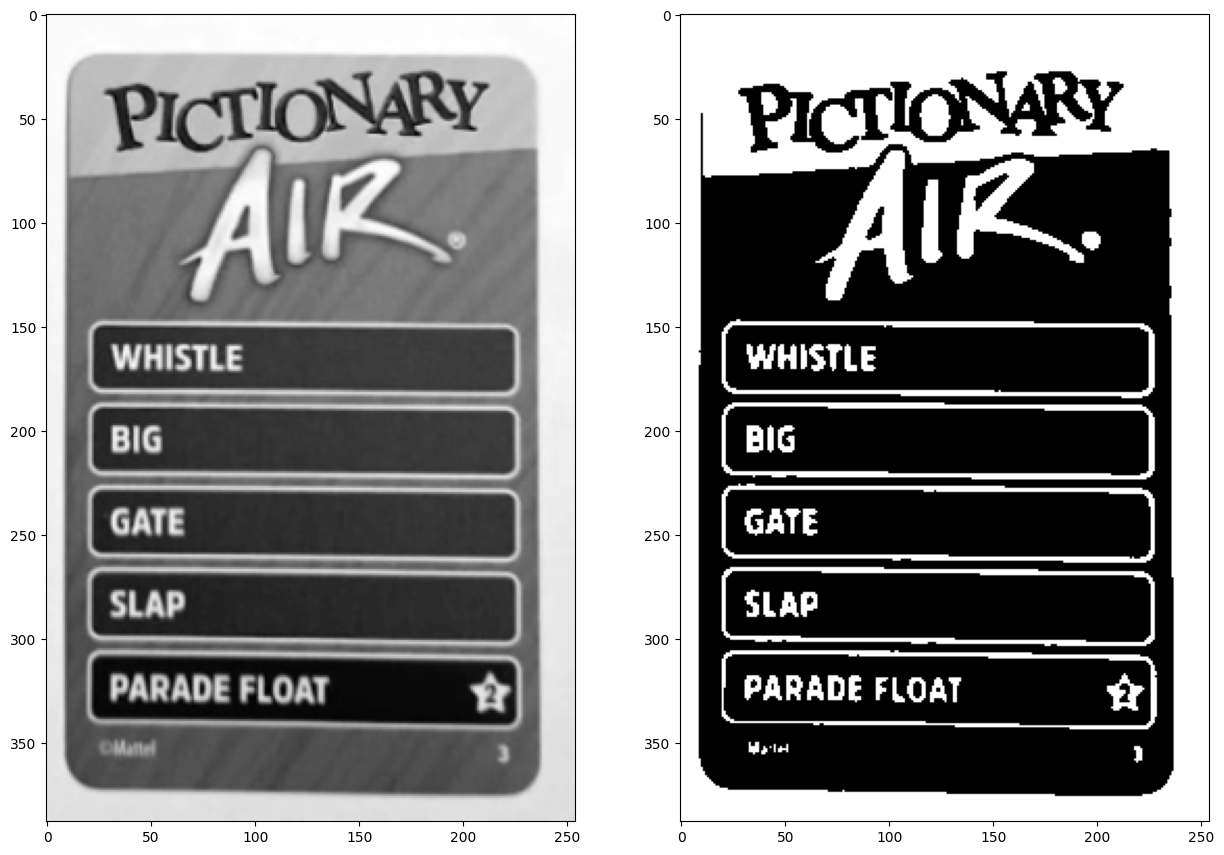

In [6]:
im = cv2.imread("../imgs/pictionary.png",0)

i = (im > 170).astype(np.uint8)
print(im.shape)
fig = plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(im,cmap='gray')
plt.subplot(122)
plt.imshow(i,cmap='gray')
plt.show()

In [7]:
def fourConnComp(i,j,im,final,visited):
    if(i<0 or i>=final.shape[0] or j<0 or j>=final.shape[1] or visited[i,j] == 1):
        return 0
    visited[i,j] = 1
    if(im[i,j] == 0):
        final[i,j] = c
        fourConnComp(i+1,j,im,final,visited)
        fourConnComp(i-1,j,im,final,visited)
        fourConnComp(i,j+1,im,final,visited)
        fourConnComp(i,j-1,im,final,visited)
    return 0

    

In [8]:
def fill_color(im):
    colors = []    
    h,w = im.shape
    visited = np.zeros((h,w))
    final = np.zeros((h,w,3),dtype = np.uint16)
    for i in range(400):
        color = [random.randint(0,255),random.randint(0,255),random.randint(0,255)]
        colors.append(color)
    k=0
    for i in range(h):
        for j in range(w):
            if(im[i,j] == 0 and visited[i,j] == 0):
                global c 
                c= colors[k]
                k+=1
                fourConnComp(i,j,im,final,visited)
    
    return final
    

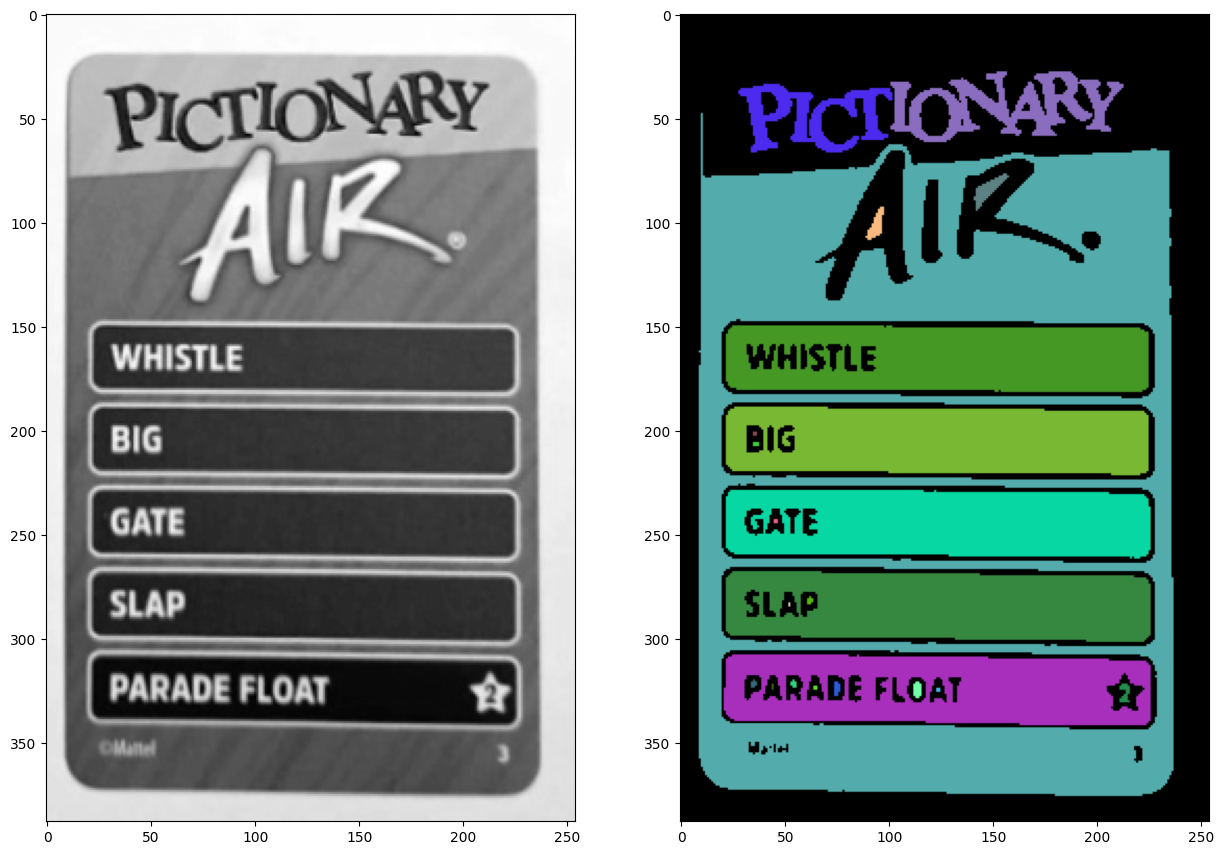

In [10]:
lol = fill_color(i)
fig = plt.figure(figsize = (15,15))
plt.subplot(121)
plt.imshow(im,cmap='gray')
plt.subplot(122)
plt.imshow(lol)
plt.show()

- - - - 
## *Question 3*

In [11]:
img = cv2.imread('original_imgs/hough.jpg')
hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
lower_red = np.array([170,110,110])
upper_red = np.array([180,150,150])
mask1 = cv2.inRange(hsv_img, lower_red, upper_red)

output_hsv = hsv_img.copy()
output_hsv[np.where(mask1==0)] = 0

cv2.imwrite("onlyred.jpg",output_hsv)

[ WARN:0@107.004] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('original_imgs/hough.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
from skimage.transform import (hough_line, hough_line_peaks)
from skimage.filters import threshold_otsu
from scipy.stats import mode

- - - - 
## *Question 3*

In [ ]:
def applyFilter(img, filter):
  # Padding image
  maxVal = max(filter.shape)
  img3 = np.zeros((img.shape[0] + 2 * maxVal, img.shape[1] + 2 * maxVal))
  img3[maxVal:img3.shape[0] - maxVal, maxVal:img3.shape[1] - maxVal] = img
  img3 = img3.astype('float')
  filter = filter.astype('float')
  img2 = img3.copy()
  # Convolution
  for r in range(filter.shape[0], img2.shape[0] - filter.shape[0] + 1):
    for c in range(filter.shape[1], img2.shape[1] - filter.shape[1] + 1):
      img2[r][c] = np.sum(img3[r - int(filter.shape[0] / 2):r - int(filter.shape[0] / 2) + filter.shape[0], c - int(filter.shape[1] / 2):c - int(filter.shape[1] / 2) + filter.shape[1]] * filter)
  # Remove padded region and return image
  return img2[maxVal:img2.shape[0] - maxVal, maxVal:img2.shape[1] - maxVal]

In [ ]:
from skimage.transform import (hough_line, hough_line_peaks)
from skimage.filters import threshold_otsu
from scipy.stats import mode
def binarizeImage(RGB_image):

  image = cv2.cvtColor(RGB_image, cv2.COLOR_BGR2GRAY)
  threshold = threshold_otsu(image)
  bina_image = image < threshold
  
  return bina_image

def findEdges(img):
  
  
  imgx = applyFilter(img, np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]))
  imgy = applyFilter(img, np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]))
  sobel = np.rint(np.sqrt(imgx ** 2 + imgy ** 2))
  sobel = np.where(sobel > 255, 255, sobel).astype('uint8')
  
  return sobel

def findTiltAngle(image_edges):
  
  h, theta, d = hough_line(image_edges)
  accum, angles, dists = hough_line_peaks(h, theta, d)
  angle = np.rad2deg(mode(angles)[0][0])
  

  r_angle = angle 

  # Plot Image and Lines    
  fig, ax = plt.subplots()
  

  ax.imshow(image_edges, cmap='gray')

  origin = np.array((0, image_edges.shape[1]))

  for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):

    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax.plot(origin, (y0, y1), '-r')

  ax.set_xlim(origin)
  ax.set_ylim((image_edges.shape[0], 0))
  ax.set_axis_off()
  ax.set_title('Detected lines')

  plt.show()
    
  return r_angle

  


In [ ]:
def imrotate(image, angle,bool):

  angle=math.radians(angle)                               #converting degrees to radians
  cosine=math.cos(angle)
  sine=math.sin(angle)
  height=image.shape[0]                                   #define the height of the image
  width=image.shape[1]                                    #define the width of the image

# Define the height and width of the new image that is to be formed
  new_height  = round(abs(image.shape[0]*cosine)+abs(image.shape[1]*sine))+1
  new_width  = round(abs(image.shape[1]*cosine)+abs(image.shape[0]*sine))+1

# define another image variable of dimensions of new_height and new _column filled with zeros
  output=np.ones((new_height,new_width,image.shape[2]))*255

# Find the centre of the image about which we have to rotate the image
  original_centre_height   = round(((image.shape[0]+1)/2)-1)    #with respect to the original image
  original_centre_width    = round(((image.shape[1]+1)/2)-1)    #with respect to the original image

# Find the centre of the new image that will be obtained
  new_centre_height= round(((new_height+1)/2)-1)        #with respect to the new image
  new_centre_width= round(((new_width+1)/2)-1)          #with respect to the new image

  for i in range(height):
      for j in range(width):
        #co-ordinates of pixel with respect to the centre of original image
          y=image.shape[0]-1-i-original_centre_height                   
          x=image.shape[1]-1-j-original_centre_width                      

        #co-ordinate of pixel with respect to the rotated image
          new_y=round(-x*sine+y*cosine)
          new_x=round(x*cosine+y*sine)

          new_y=new_centre_height-new_y
          new_x=new_centre_width-new_x

        # adding if check to prevent any errors in the processing
          if bool==True and 0 <= new_x < new_width and 0 <= new_y < new_height and new_x>=0 and new_y>=0:
              output[new_y,new_x,:]=image[i,j,:]  
  pil_img=np.array((output).astype(np.uint8))  
  return pil_img



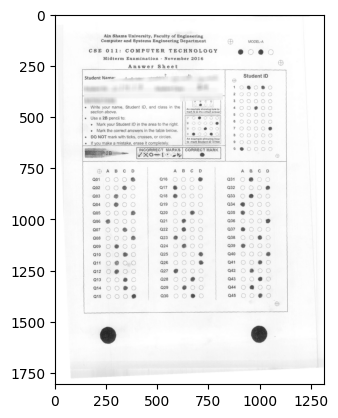

In [ ]:

img = cv2.imread("../imgs/rotatedOMR2.png")
angle = 2.5
rot = imrotate(img, angle,True)

plt.imshow(rot)
plt.show()



/tmp/ipykernel_837000/4227376246.py:26: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  angle = np.rad2deg(mode(angles)[0][0])


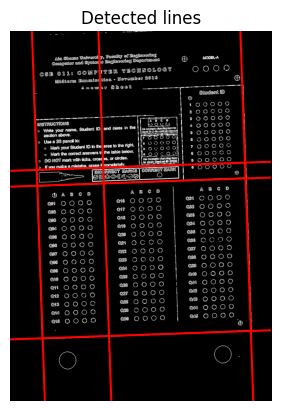

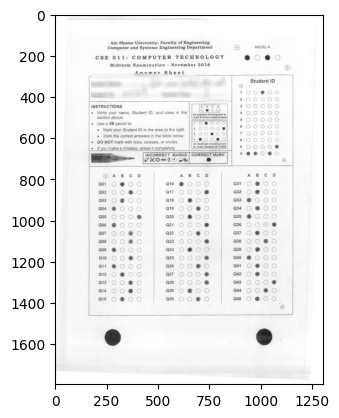

In [ ]:
img = cv2.imread("../imgs/rotatedOMR1.png")
bina_image = binarizeImage(img)
image_edges = findEdges(bina_image)
angle = findTiltAngle(image_edges)

rot = imrotate(img, angle,True)

plt.imshow(rot)
plt.show()


- - - - 
## *Question 4*

/tmp/ipykernel_837000/2579513533.py:79: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  r = np.rad2deg(mode(r)[0][0])


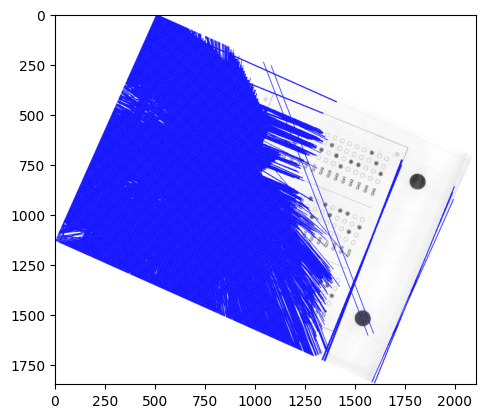

In [ ]:
img = cv2.imread("../imgs/rotatedOMR1.png")
def HoughTransform (img, threshold):

    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    #Finding The Edge points
    edge=cv2.Canny(gray,20,100)
    loc1, loc2 = np.where(edge != 0)
    a = np.dstack((np.array(loc1), np.array(loc2)))
    Edge_Coordinates = a[0]

    #Finding Dimensions of the image
    height=edge.shape[0]
    width=edge.shape[1]

    #Finding maximum rho value
    #rho values range from -D to D

    D=math.ceil(math.sqrt((width-1)**2+(height)**2))

    #Creating a hough Accumulator
    ht=np.zeros((2*D+1,182))

    #rho values
    s=np.arange(-D,D+1,+1)

    #theta values range from -90 degrees to 90 degrees
    #thetai is just a variable to store corresponding indices of theta
    theta=np.arange(-90,91,1)
    thetai=np.arange(0,181,1)

    r=0

    rr=0

    for i in Edge_Coordinates:
        y=0

        #Rho values calculated by the formula: rho= x*cos(theta)+y*sin(theta)
        r=(i[1]*np.cos(np.radians(theta))) + np.multiply(i[0], np.sin(np.radians(theta)))
        rr=np.floor(r).astype('int')+D
        #Voting
        ht[rr,thetai]+=1

    #Finding hough peaks based on threshold provided
    r, t = np.where(ht > threshold)

    return ht,r,t,theta,s



def DrawHoughLines(img,r,t,theta,s):

    w=np.dstack((np.array(r),np.array(t)))
    win=w[0]

    for i in win:

        r=i[0]
        t=i[1]
        d=s[r]
        th=math.radians(theta[t])

        a = math.cos(th)
        b = math.sin(th)
        x0 = a * d
        y0 = b * d
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

    return img


ht,r,t,theta,s=HoughTransform(img,150)
HoughLine=DrawHoughLines(img,r,t,theta,s)
r = np.rad2deg(mode(r)[0][0])
rot = imrotate(img, r,True)

plt.imshow(rot)
plt.show()



- - - - 
## *Question 5*

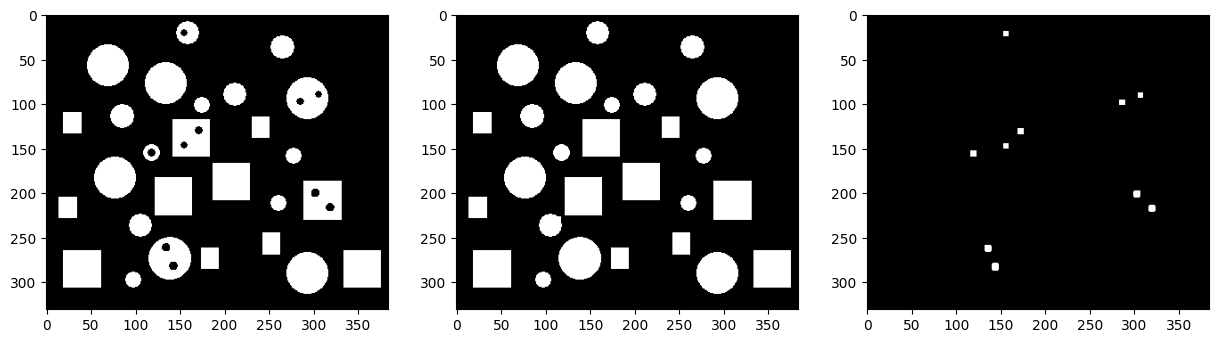

In [ ]:
im = cv2.imread("../imgs/shapes.png",0)
im = (im>127).astype(np.uint8)
kernel = np.ones((7,9))
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
im2 = cv2.dilate(im,kernel,iterations=1)
solids = cv2.erode(im2,kernel,iterations=1)
holes = solids - im
holes = cv2.erode(holes,np.ones((6,6)),iterations=1)
holes = cv2.dilate(holes,np.ones((6,6)),iterations=1)
fig = plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(im,cmap='gray')
plt.subplot(132)
plt.imshow(solids,cmap='gray')
plt.subplot(133)
plt.imshow(holes,cmap='gray')
plt.show()

In [ ]:
def fourConnComp(i,j,im,final,visited):
    if(i<0 or i>=im.shape[0] or j<0 or j>=im.shape[1] or visited[i,j] == 1):
        return 0
    
    visited[i,j] = 1
    if(im[i,j] == 1):
        final[i,j] = 1
        fourConnComp(i+1,j,im,final,visited)
        fourConnComp(i-1,j,im,final,visited)        
        fourConnComp(i,j+1,im,final,visited)        
        fourConnComp(i,j-1,im,final,visited)  
    
    return 0
    

In [ ]:
def count_comp(temp,im2):
    global c
    h,w = temp.shape
    final = np.zeros((temp.shape),dtype=np.uint16)
    visited = np.zeros((temp.shape))
    
    c = 0
    for i in range(h):
        for j in range(w):
            if(temp[i,j] == 1 and visited[i,j] == 0):
                fourConnComp(i,j,im2,final,visited)
                c = c+1
    
#     print("Objects with holes = "+str(c))
    return final

Objects with holes =  6


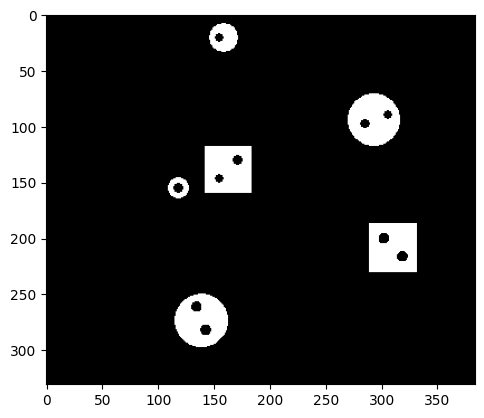

In [ ]:
obj_with_holes = count_comp(holes,solids)
# plt.imshow(final,cmap='gray')
print("Objects with holes = ",c)
final_holes = np.logical_and(obj_with_holes,im).astype(np.uint8)
plt.imshow(final_holes,cmap='gray')

In [ ]:
def filtfunc(i,f):
    k = f.shape[0] // 2
    padded_im = np.pad(i,((k,k),(k,k)),'constant')
    final = np.zeros(im.shape)
#     print(f.size)
    for i in range(k,final.shape[0]+k):
        for j in range(k,final.shape[1]+k):
            if np.sum(np.equal(padded_im[i-k:i+k+1,j-k:j+k+1], f)) == f.size:
                final[i-k,j-k] = 1
    return final

circles =  16


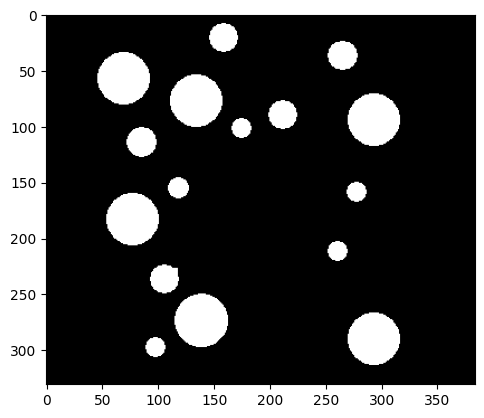

In [ ]:
se = np.array([[1,1,0],[1,1,0],[1,0,0]])

circles = filtfunc(solids,se)

final_circles = count_comp(circles,solids)
print("circles = ",c)
plt.imshow(final_circles,cmap='gray')

square with no holes =  9


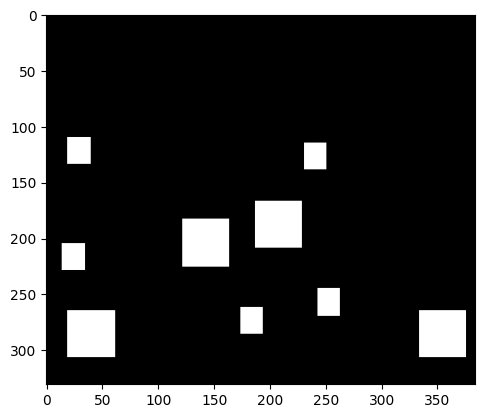

In [ ]:
no_holes = im - final_holes

se = np.array([[0,0,0],[0,1,1],[0,1,1]])

squares= filtfunc(no_holes ,se)
final_squares = count_comp(squares,no_holes)
print("square with no holes = ",c)
plt.imshow(final_squares,cmap='gray')

circles with holes =  4


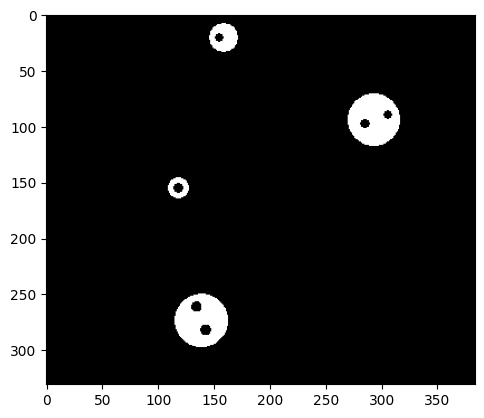

In [ ]:

se = np.array([[1,1,0],[1,1,0],[1,0,0]])

hole_circle = np.logical_and(final_circles,final_holes)
count_comp(hole_circle,hole_circle)
print("circles with holes = ",c)
plt.imshow(hole_circle,cmap='gray')

In [ ]:
def fill(temp,im2):
    h,w = temp.shape
    final = np.zeros((temp.shape),dtype=np.uint16)
    visited = np.zeros((temp.shape))
    
    for i in range(h):
        for j in range(w):
            if(temp[i,j] == 1 and visited[i,j] == 0):
                fourConnComp(i,j,im2,final,visited)
                
    return final

In [ ]:
def getBorder(im):
    border = np.zeros(im.shape)
    border[:,0] = 1
    border[:,-1] = 1
    border[0,:] = 1
    border[-1,:] = 1
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(8,8))
    im2 = cv2.erode(im,kernel,iterations=1)
    im2 = cv2.erode(im2,kernel,iterations=1)
    #plt.imshow(im2,cmap='gray')
    temp = np.logical_and(im2,border).astype(np.uint8)
    final = fill(temp,im2)
    final = cv2.dilate(final,kernel,iterations=2)
    
    return final

In [ ]:
im = cv2.imread("../imgs/circles.jpg",0)
im = (im>127).astype(np.uint8)

## overlapping cicles

In [ ]:
pix_count = 0
def fourConnComp2(i,j,visited,temp,im):
    global pix_count
    if i<0 or i>=temp.shape[0] or j<0 or j>=temp.shape[1] or visited[i,j]==1:
        return 0
    pix_count += 1
    visited[i,j] = 1
    if im[i,j]==1:
        temp[i,j] = 1
        fourConnComp2(i+1,j,visited,temp,im)
        fourConnComp2(i,j+1,visited,temp,im)
        fourConnComp2(i-1,j,visited,temp,im)
        fourConnComp2(i,j-1,visited,temp,im)
    return 0    

def find_ol(im):  
    h,w = im.shape
    visited = np.zeros((im.shape))
    temp = np.zeros((im.shape),dtype= np.uint16)
    ol = []
    for i in range(h):
        for j in range(w):
            if(im[i,j]==1 and visited[i,j]==0):
                global pix_count
                pix_count = 0
                fourConnComp2(i,j,visited,temp,im)
                if(pix_count>500):
                    ol.append([i,j])
                    
    visited = np.zeros((im.shape))
    ol_img = np.zeros(im.shape)
    for x in ol:
        if (im[x[0],x[1]]==1 and visited[x[0],x[1]]==0):
            fourConnComp2(x[0],x[1],visited,ol_img,im)            
    return  ol_img      

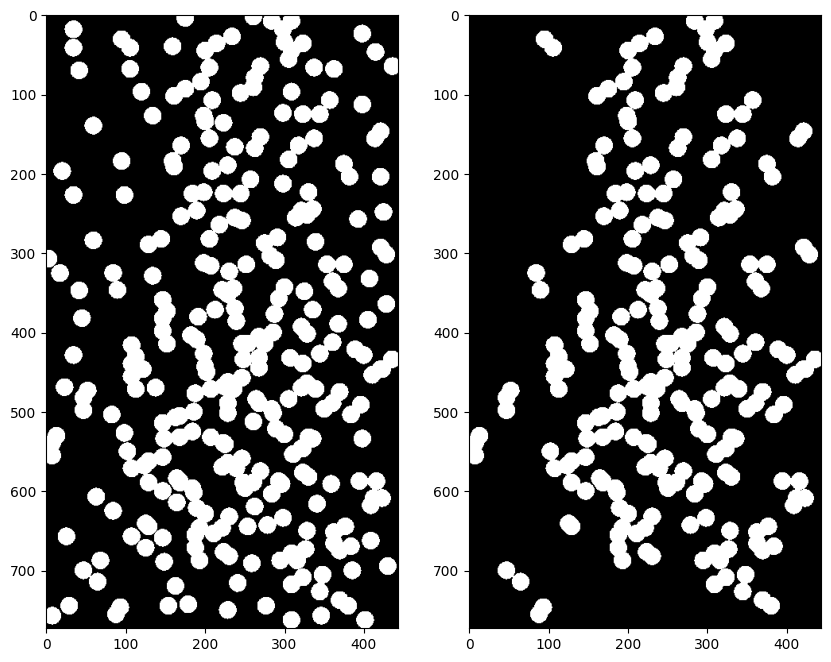

In [ ]:
ol = find_ol(im)
fig = plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(im,cmap='gray')
plt.subplot(122)
plt.imshow(ol,cmap='gray')
plt.show()

## non overlapping circles


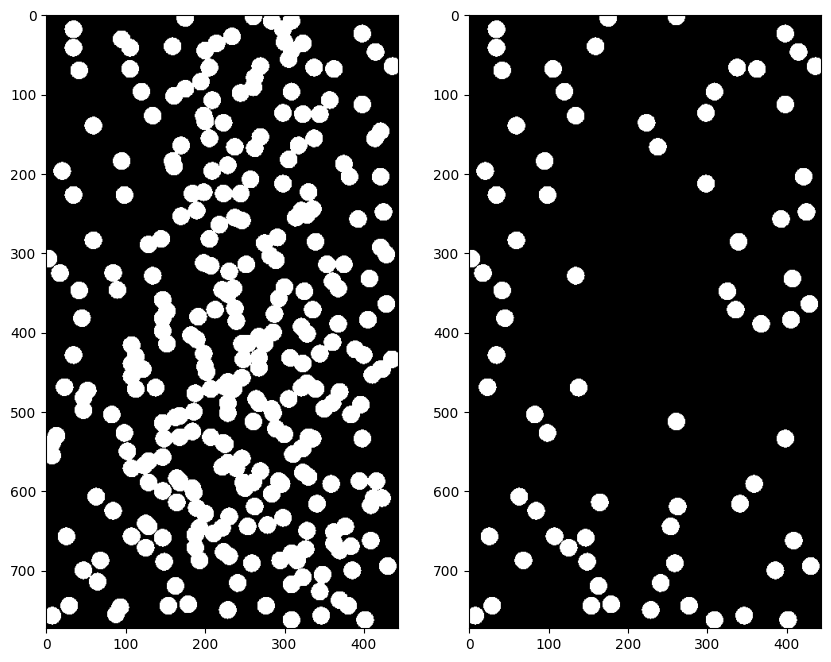

In [ ]:
nonol = im - ol
fig = plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(im,cmap='gray')
plt.subplot(122)
plt.imshow(nonol,cmap='gray')
plt.show()

## Boundary circles

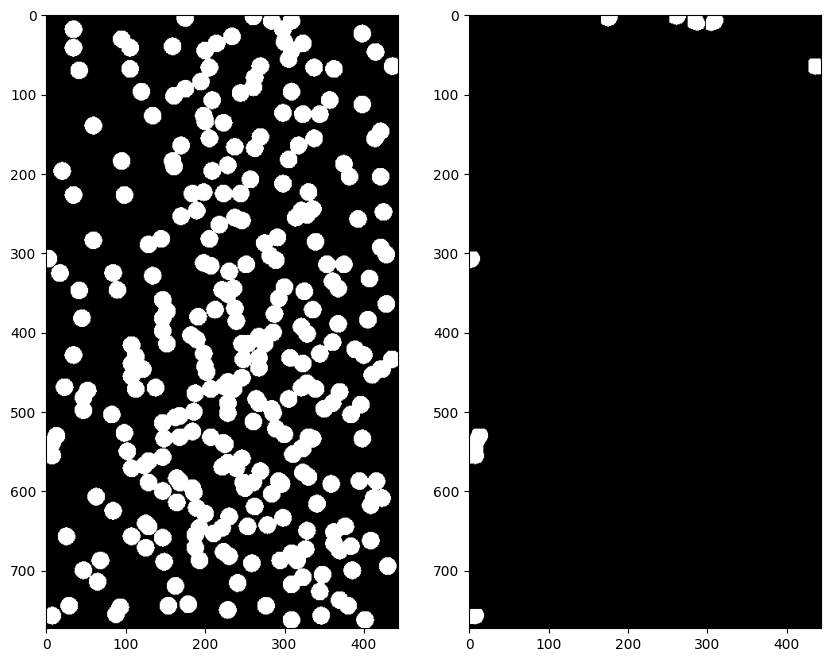

In [ ]:
final = getBorder(im)
fig = plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(im,cmap='gray')
plt.subplot(122)
plt.imshow(final,cmap='gray')
plt.show()